In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# https://www.gulfshorebusiness.com/collier-sustains-more-than-280m-in-hurricane-milton-damage/

In [70]:
!pip install rasterio netCDF4 wxee timm cartopy osmnx xarray pyresample
!apt-get install -y gdal-bin
!pip install gdal

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 108.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.0/345.0 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 104.4 MB/s eta 0:00

# $280 million loss in Hurricane Milton for Collier County

In [3]:
!ls drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json

drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json


In [4]:
import ee
import os

# Set the path to the service account key file
service_account = 'editor@ee-manmeet20singh15-wbis.iam.gserviceaccount.com'
key_file = 'drive/MyDrive/earth_engine/ee-manmeet20singh15-wbis-fab7f1ca35e0.json'

# Use the service account for authentication
credentials = ee.ServiceAccountCredentials(service_account, key_file)
ee.Initialize(credentials)
generate_dmsp = False

In [5]:
!pip install timm
!pip install wxee

In [6]:
import ee
import wxee
# wxee.Initialize()
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize
from PIL import Image
import os
import numpy as np
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.checkpoint as checkpoint
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
import numpy as np
import xarray as xr

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision.transforms import Compose, ToTensor, Resize
from PIL import Image
import os
import numpy as np
from torch.utils.tensorboard import SummaryWriter

/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)


In [7]:

import pandas as pd

# Data provided
cities = ['delhi', 'hongkong', 'melbourne', 'dubai', 'london', 'berlin', 'tokyo', 'dhaka', 'shanghai', 'saopaulo', 'mexicocity', 'cairo']
lats_  = [28.7041, 22.3193, -37.8136, 25.2048, 51.5072, 52.5200, 35.6764, 23.8041, 31.2304, -23.5558, 19.4326, 30.0444]
lons_  = [77.1025, 114.1694, 144.9631, 55.2708, -0.1276, 13.4050, 139.6500, 90.4152, 121.4737, -46.6396, -99.1332, 31.2357]

cities = ['delhi', 'hongkong', 'melbourne', 'dubai', 'london']
lats_  = [28.7041, 22.3193, -37.8136, 25.2048, 51.5072]
lons_  = [77.1025, 114.1694, 144.9631, 55.2708, -0.1276]


# Data provided
cities = ['Collier']
lats_  = [26.07]
lons_  = [-81.43]

# Creating DataFrame
df = pd.DataFrame({'Name': cities, 'lat': lats_, 'lon': lons_})
df

,Name,lat,lon
0,Collier,26.07,-81.43


In [8]:
aoi_city = []
for i in range(len(df.lat)):
  lats, late = df.lat[i]-2.5, df.lat[i]+2.5
  lons, lone = df.lon[i]-2.5, df.lon[i]+2.5
  aoi = ee.Geometry.Polygon(
        [[[lons, lats],
          [lone, lats],
          [lone, late],
          [lons, late]]])
  aoi_city.append(aoi)
aoi_city[0]

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -83.93,
              23.57
            ],
            [
              -78.93,
              23.57
            ],
            [
              -78.93,
              28.57
            ],
            [
              -83.93,
              28.57
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [9]:
city_names=[]
for i in range(len(df.Name)):
  city = str(df.Name[i])
  city_names.append(city)
city_names

['Collier']

In [10]:
lats_=[]
for i in range(len(df.lat)):
  lat_city = (df.lat[i])
  lats_.append(lat_city)
lats_


[26.07]

In [11]:
lons_=[]
for i in range(len(df.lon)):
  lon_city = (df.lon[i])
  lons_.append(lon_city)
lons_

[-81.43]

In [12]:

%run drive/MyDrive/Shivam/Long_DMSP_NDUI/SwinIR_train_function.py

In [13]:
!ls drive/MyDrive/best_model_lats_25.0_late_30.0_lons_80.0_lone_85.0.pth

drive/MyDrive/best_model_lats_25.0_late_30.0_lons_80.0_lone_85.0.pth


In [14]:
if generate_dmsp:
    upscale = 1
    window_size = 5
    height = 30 #(1024 // upscale // window_size + 1) * window_size
    width = 30 #(720 // upscale // window_size + 1) * window_size
    device = 'cuda'
    model = SwinIR(upscale=1, img_size=(height, width),
                window_size=window_size, img_range=1., depths=[6, 6, 6, 6],
                embed_dim=60, num_heads=[6, 6, 6, 6], mlp_ratio=2, upsampler='pixelshuffledirect').to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    F101992 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101992').select('stable_lights')
    F101993 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101993').select('stable_lights')
    F101994 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F101994').select('stable_lights')
    F121994 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121994').select('stable_lights')
    F121995 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121995').select('stable_lights')
    F121996 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121996').select('stable_lights')
    F121997 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121997').select('stable_lights')
    F121998 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121998').select('stable_lights')
    F121999 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F121999').select('stable_lights')
    F141997 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141997').select('stable_lights')
    F141998 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141998').select('stable_lights')
    F141999 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F141999').select('stable_lights')
    F142000 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142000').select('stable_lights')
    F142001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142001').select('stable_lights')
    F142002 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142002').select('stable_lights')
    F142003 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F142003').select('stable_lights')
    F152000 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152000').select('stable_lights')
    F152001 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152001').select('stable_lights')
    F152002 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152002').select('stable_lights')
    F152003 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152003').select('stable_lights')
    F152004 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152004').select('stable_lights')
    F152005 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152005').select('stable_lights')
    F152006 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152006').select('stable_lights')
    F152007 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F152007').select('stable_lights')
    F162004 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162004').select('stable_lights')
    F162005 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162005').select('stable_lights')
    F162006 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162006').select('stable_lights')
    F162007 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162007').select('stable_lights')
    F162008 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162008').select('stable_lights')
    F162009 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F162009').select('stable_lights')
    F182010 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182010').select('stable_lights')
    F182011 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182011').select('stable_lights')
    F182012 = ee.Image('NOAA/DMSP-OLS/NIGHTTIME_LIGHTS/F182012').select('stable_lights')

    collections = [F101992, F101993, F101994, F121994, F121995, F121996, F121997, F121998, F121999, F141997, F141998,
                        F141999, F142000, F142001,F142002, F142003, F152000, F152001, F152002, F152003, F152004, F152005,
                        F152006, F152007,F162004, F162005, F162006, F162007, F162008, F162009, F182010, F182011, F182012]

    c = [-3.06516, -2.0638, -1.68421, -1.71621, 0.530922, 0.303469, -0.18513, 0.490138, 1.800988, -0.6186,
            -0.91352, -1.37993, 0.061872, 0.249452, 1.127103, 0.866522,0, 0.005164,-0.04462, -0.27189, -0.06977, 0.449229,
            0.913485, 0.644785, -0.02563, -0.54115, -0.38377, 0.629564, 0.745403, -0.15161, 6.22332, 1.427157, 3.866698]

    b = [-0.00698, -0.00726, -0.00695, -0.00454, 0.00011, -0.00176, -0.00057, 0.001236, 0.002969, -0.0094,
        -0.00929, -0.00889, -0.00469, -0.00452, -0.00221, -0.00351, 0, 8.94e-05, 0.000117, -0.0085, -0.00912, -0.00601,
        -0.00595, -0.00675, -0.00496, -0.0094, -0.0061, -0.00084, -0.00062, -0.00278, 0.014627,0.002877, 0.007962]

    a = [1.519907, 1.516595, 1.491333, 1.331971, 0.984465, 1.111207, 1.034429, 0.905787, 0.761106, 1.603921,
        1.603648, 1.586457, 1.294471, 1.275902, 1.128708, 1.206319, 1, 1.002879, 0.987943, 1.555808, 1.591033, 1.401146,
        1.381139,1.448976, 1.317581, 1.613536, 1.41435, 1.040815, 1.037042, 1.193437, -0.08536, 0.774923, 0.355542]

In [15]:
if generate_dmsp:
    #Image correction using coefficient
    images = [0 for _ in range(33)]
    count = 0
    total_list = []
    images_correct = [0 for _ in range(33)]

    def fun3(raw,correct):
        out = correct.where(raw.lt(5.0),raw.float())
        return out

    for i in range(33):
        images[i] = ee.Image(a[i]).multiply(collections[i].float()).add(ee.Image(b[i]).multiply(collections[i].float().pow(2))).add(ee.Image(c[i]))
        images_correct[i] = fun3(collections[i],images[i]).select('constant')

In [16]:
if generate_dmsp:
    best_model_swinir_path =[]
    for i in range(len(city_names)):
        path = 'drive/MyDrive/best_model_lats_25.0_late_30.0_lons_80.0_lone_85.0.pth'
        print(path)
        best_model_swinir_path.append(path)

In [17]:
if generate_dmsp:
    loaded_model_city= []
    for i in range(len(city_names)):

        model_save_path = best_model_swinir_path[i]
        print(city_names[i])
        upscale = 1
        window_size = 5
        height = 30 #(1024 // upscale // window_size + 1) * window_size
        width = 30 #(720 // upscale // window_size + 1) * window_size
        device = 'cuda'
        loaded_model = SwinIR(upscale=1, img_size=(height, width),
                    window_size=window_size, img_range=1., depths=[6, 6, 6, 6],
                    embed_dim=60, num_heads=[6, 6, 6, 6], mlp_ratio=2, upsampler='pixelshuffledirect').to(device)
        loaded_model.load_state_dict(torch.load(model_save_path))
        loaded_model.eval()
        loaded_model_city.append(loaded_model)

In [18]:
if generate_dmsp:

    aoi_city = []
    for i in range(len(df.lat)):
        lats, late = df.lat[i]-2.5, df.lat[i]+2.5
        lons, lone = df.lon[i]-2.5, df.lon[i]+2.5
        aoi = ee.Geometry.Polygon(
                [[[lons, lats],
                [lone, lats],
                [lone, late],
                [lons, late]]])
        aoi_city.append(aoi)
    aoi_city[0]

In [19]:
coords = aoi_city[0].coordinates().getInfo()[0]
coords

[[-83.93, 23.57],
 [-78.93, 23.57],
 [-78.93, 28.57],
 [-83.93, 28.57],
 [-83.93, 23.57]]

In [20]:
if generate_dmsp:
    dmsp_image_2012 = images_correct[-1]
    years = np.arange(2012,1991,-1)
    #years
    indices = [-1, -2, -3, -4, -5, -6, -7, -8, -9, -14, -15, -16, -17, -22, -23, -24, -28, -29, -30, -32, -33]
    dmsp_image = images_correct[indices[0]]
    years[indices[0]]

In [21]:
if generate_dmsp:
    dmsp_image_2012 = dmsp_image_2012.set('system:time_start', 0)
    ds_dmsp_2012_city = []
    for i in range(len(city_names)):
        ds_dmsp_c2012 = dmsp_image_2012.wx.to_xarray(region=aoi_city[i].bounds(), scale=927.67)
        ds_dmsp_2012_city.append(ds_dmsp_c2012)
    ds_dmsp_2012_city[0]

In [22]:
if generate_dmsp:
    # Calling VIIRS 2012 from GEE
    dataset = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG').filter(ee.Filter.date('2012-01-01', '2013-12-31'))
    viirs_image_2012 = dataset#.select('avg_rad').mean()

In [23]:
if generate_dmsp:
    ## clipping for cities in the list
    viirs_image_2012 = viirs_image_2012.set('system:time_start', 0)
    ds_viirs_2012_city=[]
    for i in range(len(city_names)):
        ds_viirs_c2012 = viirs_image_2012.wx.to_xarray(region=aoi_city[i].bounds(), scale=463.83)
        ds_viirs_2012_city.append(ds_viirs_c2012)
    ds_viirs_2012_city[0]

In [24]:
if generate_dmsp:
    ds_viirs_i2012_city = []
    for i in range(len(city_names)):
        ds_viirs_ic2012= ds_viirs_2012_city[i].sel(time=slice('2012','2012')).mean(dim='time').interp(x=ds_dmsp_2012_city[i].x.values, y=ds_dmsp_2012_city[i].y.values,method="cubic", kwargs={"fill_value": "extrapolate"})
        ds_viirs_i2012_city.append(ds_viirs_ic2012)
    ds_viirs_i2012_city[0]

In [25]:
if generate_dmsp:
    x_train_2012_city =[]
    y_train_2012_city = []
    for i in range(len(city_names)):
        x_train_2012 = ds_viirs_i2012_city[i].avg_rad.values.astype(np.float32)
        y_train_2012 = ds_dmsp_2012_city[i].constant.values[0,:,:].astype(np.float32)
        x_train_2012_city.append(x_train_2012)
        y_train_2012_city.append(y_train_2012)
    x_train_2012_city[0], y_train_2012_city[0]

In [26]:
if generate_dmsp:
    ## Getting max value of training dataset for City
    x_train_2012_max_city = []
    y_train_2012_max_city = []
    for i in range(len(city_names)):
        x_train_c2012_m = x_train_2012_city[i].max()
        y_train_c2012_m = y_train_2012_city[i].max()
        x_train_2012_max_city.append(x_train_c2012_m)
        y_train_2012_max_city.append(y_train_c2012_m)

In [27]:
def unpatchify(patches, img_shape):
    patch_size = patches.shape[1]
    assert patches.shape[0] == (img_shape[0] // patch_size) * (img_shape[1] // patch_size), "Patches and image shape are not compatible"

    img = np.zeros(img_shape, dtype=patches.dtype)
    patch_idx = 0

    for i in range(0, img_shape[0], patch_size):
        for j in range(0, img_shape[1], patch_size):
            img[i:i + patch_size, j:j + patch_size] = patches[patch_idx]
            patch_idx += 1

    return img

def patchify(img, patch_size):
    img_shape = img.shape
    patches = np.array([img[i:i + patch_size, j:j + patch_size] for i in range(0, img_shape[0], patch_size) for j in range(0, img_shape[1], patch_size)])
    return patches

class ncDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __getitem__(self, index):
        x = torch.from_numpy(self.data[index]).unsqueeze(0)
        y = torch.from_numpy(self.targets[index]).unsqueeze(0)
        # x = self.data[index]
        # y = self.targets[index]
        # x = x.to(dtype=torch.float32)
        # y = y.to(dtype=torch.float32)
        return x, y

    def __len__(self):
        return len(self.data)

In [28]:
if generate_dmsp:
    patch_size = 30

    patches_2012_city =[]
    img_2012_city = []
    for i in range(len(city_names)):
        img_c2012 = x_train_2012_city[i][:600,:600]
        patches_c2012 = patchify(img_c2012, patch_size)
        img_2012_city.append(img_c2012)
        patches_2012_city.append(patches_c2012)

In [29]:
if generate_dmsp:
    reconstructed_predicted_sr_2012_city =[]

    for i in range(len(city_names)):
        x_train_c2012 = x_train_2012_city[i]
        y_train_c2012 = y_train_2012_city[i]
        x_train_c2012_max = x_train_c2012.max()
        y_train_c2012_max = y_train_c2012.max()
        # Normalizing
        x_train_c2012 /= x_train_c2012_max       #sets x_train to x_train/x_train_max
        y_train_c2012 /= y_train_c2012_max
        x_train_patches_c2012 = patchify(x_train_c2012[:600,:600], patch_size)[:,np.newaxis,:,:]
        x_train_patches_c2012_tensor = torch.from_numpy(x_train_patches_c2012).to(device)
        with torch.no_grad():
            predicted_sr_c2012 = loaded_model_city[i](x_train_patches_c2012_tensor)
        predicted_sr_c2012_np = predicted_sr_c2012.cpu().numpy() * y_train_c2012_max  #why .cpu() used??
        predicted_sr_c2012_np[predicted_sr_c2012_np<0] = 0.0
        reconstructed_predicted_sr_c2012 = unpatchify(predicted_sr_c2012_np[:,0,:,:], img_2012_city[i].shape)
        reconstructed_predicted_sr_2012_city.append(reconstructed_predicted_sr_c2012)

In [30]:
if generate_dmsp:
    ds_dmsp_vi_swin_2012_city = []
    for i in range(len(city_names)):
        lats_c2012 = ds_dmsp_2012_city[i].y.values[:600]
        lons_c2012 =  ds_dmsp_2012_city[i].x.values[:600]
        dmsp_c2012_ = ds_dmsp_2012_city[i].constant.values[0,:600,:600]
        ds_dmsp_vi_swin_c2012 = xr.Dataset({
        'dmsp': xr.DataArray(
                    data   = dmsp_c2012_,   # enter data here
                    dims   = ['lat', 'lon'],
                    coords = {'lat': lats_c2012, 'lon': lons_c2012},

                    ),
        'viirs_swinir': xr.DataArray(
                    data   = reconstructed_predicted_sr_2012_city[i],   # enter data here
                    dims   = ['lat', 'lon'],
                    coords = {'lat': lats_c2012, 'lon': lons_c2012},
                    ),
        'viirs': xr.DataArray(
                    data   = ds_viirs_i2012_city[i].avg_rad.values[:600,:600],   # enter data here
                    dims   = ['lat', 'lon'],
                    coords = {'lat': lats_c2012, 'lon': lons_c2012},
                    )
                },
        )
        ds_dmsp_vi_swin_2012_city.append(ds_dmsp_vi_swin_c2012)

    ds_dmsp_vi_swin_2012_city[0]

In [31]:
if generate_dmsp:
# setting date for annual data
    dates = pd.date_range('1992', '2012', freq='YS')[::-1]
    dates

In [32]:
# Creating dmsp timeseries dataset for Cities
if generate_dmsp:
    ds_dmsp_2012_1992_city = []
    for j in range(len(city_names)):
        dmsp_c2012_1992 = []
        for i_ind,ind in enumerate(indices):
            dmsp_image = images_correct[ind]
            print(years[i_ind])
            dmsp_image = dmsp_image.set('system:time_start', 0)
            ds_dmsp_c = dmsp_image.wx.to_xarray(region=aoi_city[j].bounds(), scale=927.67)
            dmsp_c2012_1992.append(ds_dmsp_c.constant.values[0,:600,:600])
        dmsp_c2012_1992_np =  np.stack(dmsp_c2012_1992)
        print(dmsp_c2012_1992_np.shape)
        print(ds_dmsp_c.x[0])

        lats_c = ds_dmsp_c.y.values[:600]
        lons_c = ds_dmsp_c.x.values[:600]

        ds_dmsp_c2012_1992 = xr.Dataset({
            'dmsp': xr.DataArray(
                        data   = dmsp_c2012_1992_np,   # enter data here
                        dims   = ['time', 'lat', 'lon'],
                        coords = {'time':dates, 'lat': lats_c, 'lon': lons_c},

                        ),
                    },
                )
        ds_dmsp_2012_1992_city.append(ds_dmsp_c2012_1992)
        print(ds_dmsp_c.constant.values.mean())

    ds_dmsp_2012_1992_city[0]

In [33]:
if generate_dmsp:
    for i in range(len(city_names)):
        ds_dmsp_2012_1992_city[i].to_netcdf('dmsp_1992_2012_'+city_names[i]+'.nc')

In [34]:
if generate_dmsp:
    dates = pd.date_range('2013', '2024', freq='YS')
    dates

In [35]:
if generate_dmsp:
    ds_dmsp_2013_2022_city = []
    for j in range(len(city_names)):
        print(city_names[j])
        ds_dmsp_c2013_2022 = []
        for year_ in range(2013,2025):
            year = str(year_)#'2013'
            dataset_y = ee.ImageCollection('NOAA/VIIRS/DNB/MONTHLY_V1/VCMCFG').filter(ee.Filter.date(year+'-01-01', year+'-12-31'))
            viirs_image_y = dataset_y#.select('avg_rad').mean()
            viirs_image_y = viirs_image_y.set('system:time_start', 0)
            ds_viirs_c_y = viirs_image_y.wx.to_xarray(region=aoi_city[j].bounds(), scale=463.83)
            ds_viirs_interp_c_y = ds_viirs_c_y.sel(time=slice(year,year)).mean(dim='time').interp(x=ds_dmsp_2012_city[j].x.values, y=ds_dmsp_2012_city[j].y.values,method="cubic", kwargs={"fill_value": "extrapolate"})

            x_train_c_y = ds_viirs_interp_c_y.avg_rad.values.astype(np.float32)
            img_c_y = x_train_c_y[:600,:600]

            print('x_train_2012_cj_max:',x_train_2012_max_city[j],'y_train_2012_cj_max:', y_train_2012_max_city[j])

            x_train_c_y /= x_train_2012_max_city[j]
            x_train_c_y_patches = patchify(x_train_c_y[:600,:600], patch_size)[:,np.newaxis,:,:]
            x_train_c_y_patches_tensor = torch.from_numpy(x_train_c_y_patches).to(device)
            with torch.no_grad():
                predicted_sr_c_y = loaded_model_city[j](x_train_c_y_patches_tensor)
            predicted_sr_c_y_np = predicted_sr_c_y.cpu().numpy() * y_train_2012_max_city[j]
            predicted_sr_c_y_np[predicted_sr_c_y_np<0] = 0.0
            reconstructed_predicted_sr_c_y = unpatchify(predicted_sr_c_y_np[:,0,:,:], img_c_y.shape)
            ds_dmsp_c2013_2022.append(reconstructed_predicted_sr_c_y)

        ds_dmsp_c2013_2022_np =  np.stack(ds_dmsp_c2013_2022)
        print(ds_dmsp_c2013_2022_np.shape)

        lats_cj = ds_dmsp_2012_city[j].y.values[:600]
        lons_cj = ds_dmsp_2012_city[j].x.values[:600]
        print(lats_cj[0], lats_cj[0])

        ds_dmsp_cj_2013_2022 = xr.Dataset({
        'dmsp': xr.DataArray(
                    data   = ds_dmsp_c2013_2022_np,   # enter data here
                    dims   = ['time', 'lat', 'lon'],
                    coords = {'time':dates, 'lat': lats_cj, 'lon': lons_cj},

                    ),
                },
        )
        ds_dmsp_2013_2022_city.append(ds_dmsp_cj_2013_2022)
    #   print(ds_dmsp_cj_2013_2022.dmsp.mean())

In [36]:
if generate_dmsp:
    for i in range(len(city_names)):
        ds_dmsp_2013_2022_city[i].to_netcdf('dmsp_2013_2024_'+str(city_names[i])+'.nc')

In [37]:
!ls

drive  ndui_2024_C.nc  sample_data


In [38]:
if generate_dmsp:
    ds_dmsp_1992_2022_city = []
    for i in range(len(city_names)):
        ds_dmsp_c_1992_2022 = xr.concat([ds_dmsp_2012_1992_city[i], ds_dmsp_2013_2022_city[i]], dim='time').sortby('time')
        ds_dmsp_1992_2022_city.append(ds_dmsp_c_1992_2022)

    ds_dmsp_1992_2022_city[0]

In [39]:
if generate_dmsp:
    for i in range(len(city_names)):
        ds_dmsp_1992_2022_city[i].to_netcdf('dmsp_1992_2024_'+str(city_names[i])+'.nc')

In [40]:
!ls

drive  ndui_2024_C.nc  sample_data


In [41]:
if generate_dmsp:
    !cp *1992_2024* drive/MyDrive/ndui/

In [42]:
aoi_city[0]

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              -83.93,
              23.57
            ],
            [
              -78.93,
              23.57
            ],
            [
              -78.93,
              28.57
            ],
            [
              -83.93,
              28.57
            ]
          ]
        ]
      },
      "evenOdd": {
        "constantValue": true
      }
    }
  }
})

In [43]:
import ee

# Original bounds of aoi_city
min_lon, min_lat = -83.93, 23.57
max_lon, max_lat = -78.93, 28.57

# Get the coordinates of the aoi_city polygon directly
aoi_coordinates = aoi_city[0].getInfo()['coordinates'][0]

# Extract min and max latitude and longitude
min_lon = min([point[0] for point in aoi_coordinates])
max_lon = max([point[0] for point in aoi_coordinates])
min_lat = min([point[1] for point in aoi_coordinates])
max_lat = max([point[1] for point in aoi_coordinates])


# Calculate the midpoint
mid_lon = (min_lon + max_lon) / 2
mid_lat = (min_lat + max_lat) / 2

# Define a smaller bounding box around the midpoint
# Here, we reduce the range by 50%
lon_range = (max_lon - min_lon) * 0.05
lat_range = (max_lat - min_lat) * 0.05

# Define the smaller AOI bounds
smaller_min_lon = mid_lon - lon_range
smaller_max_lon = mid_lon + lon_range
smaller_min_lat = mid_lat - lat_range
smaller_max_lat = mid_lat + lat_range

# Create the smaller AOI as an Earth Engine geometry
aoi_city_smaller = ee.Geometry.Rectangle([
    smaller_min_lon, smaller_min_lat, smaller_max_lon, smaller_max_lat
])

# Print the smaller AOI coordinates
print("Smaller AOI bounds:", aoi_city_smaller.getInfo())

Smaller AOI bounds: {'type': 'Polygon', 'coordinates': [[[-81.68, 25.82], [-81.18, 25.82], [-81.18, 26.32], [-81.68, 26.32], [-81.68, 25.82]]]}


# Generate 1 year of raw NDUI

In [44]:
year_ = 2024
year = str(year_)

L7 = ee.ImageCollection("LANDSAT/LE07/C02/T1_TOA").filterDate(year+'-01-01', year+'-12-31')

def fun4(img):
    bad1 = img.select('B1').eq(0.0)
    bad2 = img.select('B2').eq(0.0)
    bad3 = img.select('B3').eq(0.0)
    bad4 = img.select('B4').eq(0.0)
    bad5 = img.select('B5').eq(0.0)
    bad7 = img.select('B7').eq(0.0)
    mask = img.mask().And(bad1.Or(bad2).Or(bad3).Or(bad4).Or(bad5).Or(bad7).Not())
    masked = img.mask(mask)
    ndvi = masked.normalizedDifference(["B4", "B3"])
    return ndvi

NDVIs = L7.map(fun4)

# Generate NDVI statistics for the year
Mean_NDVI = NDVIs.median()
Max_NDVI = NDVIs.max()
Min_NDVI = NDVIs.min()

mosaic = Mean_NDVI.where(Max_NDVI.gt(0.4), Max_NDVI)
mosaic = mosaic.where(Min_NDVI.lt(-0.2), Min_NDVI)

mosaic = mosaic.set('system:time_start', 0)
ds_ndvi_c = mosaic.wx.to_xarray(region=aoi_city_smaller.bounds(), scale=30)
ds_ndvi_c_ = ds_ndvi_c.nd.values[0,:,:]

# Load the DMSP dataset and interpolate for the same year
ds_dmsp_1992_2022_city = xr.open_dataset('/content/drive/MyDrive/ndui/dmsp_1992_2024_Collier.nc')
ds_dmsp_interp_c = ds_dmsp_1992_2022_city.sel(time=slice(year, year)).interp(lon=ds_ndvi_c.x, lat=ds_ndvi_c.y).dmsp.values[0,:,:]/63.0

# Calculate NDUI
ndui_c = (ds_dmsp_interp_c - ds_ndvi_c_)/(ds_dmsp_interp_c + ds_ndvi_c_)
ndui_c[ndui_c > 1.0] = 1.0
ndui_c[ndui_c < -1.0] = -1.0

# Stack the result and save as NetCDF for one city and one year
ds_ndui_c = xr.Dataset({
    'ndui': xr.DataArray(
        data=ndui_c,  # enter data here
        dims=['lat', 'lon'],
        coords={'lat': ds_ndvi_c.y.values, 'lon': ds_ndvi_c.x.values},
    ),
})

print(ds_ndui_c)

# Save the NetCDF file
ds_ndui_c.to_netcdf('ndui_' + year + '_' + city[0] + '.nc')

Downloading:   0%|          | 0.00/3.31M [00:00<?, ?iB/s]

<xarray.Dataset> Size: 28MB
Dimensions:  (lat: 1858, lon: 1856)
Coordinates:
  * lat      (lat) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
  * lon      (lon) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
Data variables:
    ndui     (lat, lon) float64 28MB -0.2443 -0.2447 -0.1145 ... -0.998 -0.9992


In [45]:
!ls

drive  ndui_2024_C.nc  sample_data


In [46]:
collection = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1')
dynamic = collection.filterDate('2024-01-01', '2024-12-31').filterBounds(aoi_city_smaller).select('built').mean()
dynamic = dynamic.set('system:time_start', 0)
ds_dyn_built = dynamic.wx.to_xarray(region=aoi_city_smaller.bounds(), scale=30)

Downloading:   0%|          | 0.00/17.4M [00:00<?, ?iB/s]

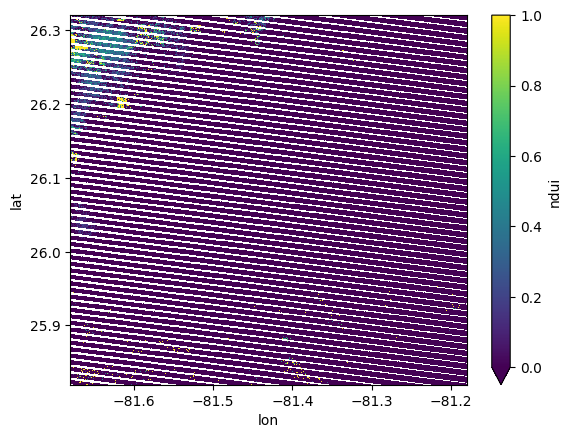

In [47]:
ds_ndui_c.ndui.plot(vmin=0)

In [48]:
mask = ds_dyn_built.built > 0.2

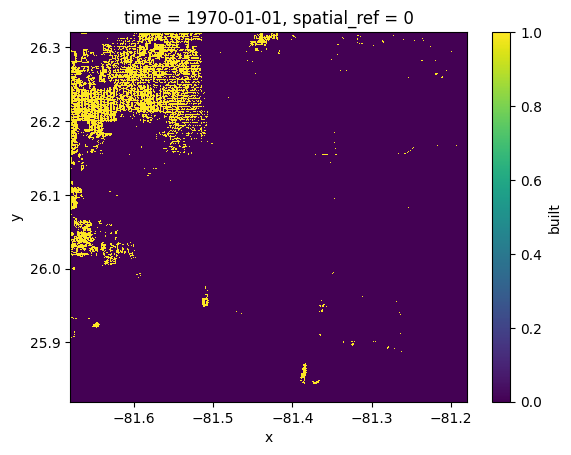

In [49]:
mask.plot()

In [51]:
ds_ndui_c.ndui

<xarray.DataArray 'ndui' (lat: 1858, lon: 1856)> Size: 28MB
array([[-0.24428885, -0.24474241, -0.11447468, ...,         nan,
                nan,         nan],
       [-0.11380276, -0.11461007, -0.03739717, ..., -0.99736109,
        -0.99856256, -0.99939838],
       [ 0.063292  , -0.03238496,  0.05015006, ..., -0.99794356,
        -0.9984168 , -0.99941234],
       ...,
       [        nan,         nan,         nan, ..., -0.99624293,
        -0.99769195, -0.99840796],
       [        nan,         nan,         nan, ..., -0.99636403,
        -0.9977664 , -0.99917074],
       [        nan,         nan,         nan, ..., -0.99678437,
        -0.99802478, -0.99919841]])
Coordinates:
  * lat      (lat) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
  * lon      (lon) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18

In [54]:
ndui_collier_np = ds_ndui_c.ndui.values*mask.values

In [56]:
ndui_collier_np.shape

(1, 1858, 1856)

In [57]:
ds_ndui_c['ndui_mask'] = (('lat', 'lon'), ndui_collier_np[0,:,:])
ds_ndui_c

<xarray.Dataset> Size: 55MB
Dimensions:    (lat: 1858, lon: 1856)
Coordinates:
  * lat        (lat) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
  * lon        (lon) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
Data variables:
    ndui       (lat, lon) float64 28MB -0.2443 -0.2447 ... -0.998 -0.9992
    ndui_mask  (lat, lon) float64 28MB -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0

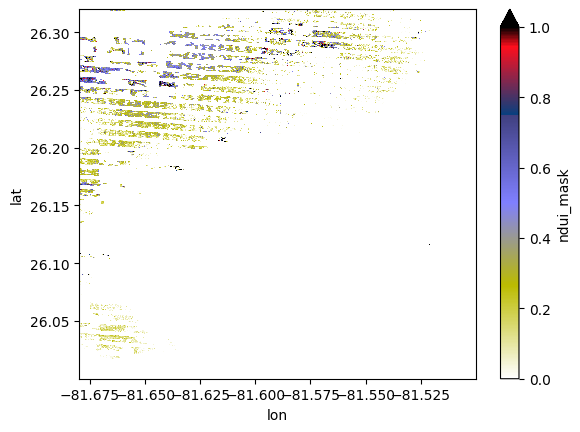

In [68]:
ds_ndui_c.sel(lon=slice(-81.68,-81.5)).sel(lat=slice(26.32,26)).ndui_mask.plot(cmap='gist_stern_r', vmin=0, vmax=1, extend='max')

In [73]:
import osmnx as ox
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np
import matplotlib.patheffects as PathEffects
city_names

['Collier']

In [150]:
# Get the road network within Austin
road_network = ox.graph_from_place(city_names[0], network_type='all')
# Convert road network to GeoDataFrame
road_edges = ox.graph_to_gdfs(road_network, nodes=False, edges=True)
# Filter for major roads (primary, secondary, tertiary)
major_road_types = ['primary', 'secondary', 'tertiary']
major_road_types = ['primary', 'secondary', 'tertiary', 'residential']
major_roads = road_edges[road_edges['highway'].isin(major_road_types)]

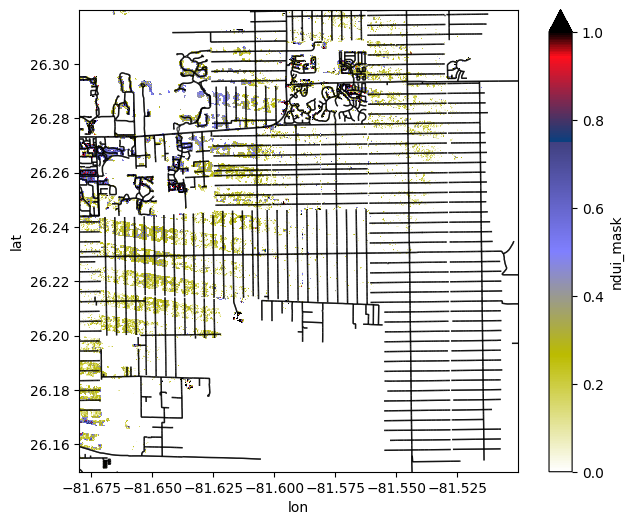

In [151]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_ndui_c.sel(lon=slice(-81.68,-81.5)).sel(lat=slice(26.32,26.15)).ndui_mask.plot(cmap='gist_stern_r', vmin=0, vmax=1, extend='max', ax=axes)

# Flooding during Hurricane Milton over Collier County

Hurricane made landfall on Oct 9, 2024

https://www.naplesnews.com/story/news/local/2024/10/23/collier-county-saw-280-million-in-property-damage-by-hurricane-milton/75778230007/

# Dynamic World

In [152]:
collection = ee.ImageCollection('GOOGLE/DYNAMICWORLD/V1')
dynamic = collection.filterDate('2024-10-01', '2024-10-31').filterBounds(aoi_city_smaller).select('water')
ds_dyn_water = dynamic.wx.to_xarray(region=aoi_city_smaller.bounds(), scale=30)

Requesting data:   0%|          | 0/13 [00:00<?, ?it/s]

In [153]:
ds_dyn_water

<xarray.Dataset> Size: 359MB
Dimensions:      (time: 13, x: 1856, y: 1858)
Coordinates:
  * time         (time) datetime64[ns] 104B 2024-10-01T16:06:03 ... 2024-10-2...
  * x            (x) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
  * y            (y) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
    spatial_ref  int64 8B 0
Data variables:
    water        (time, y, x) float64 359MB nan nan nan nan ... nan nan nan nan
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

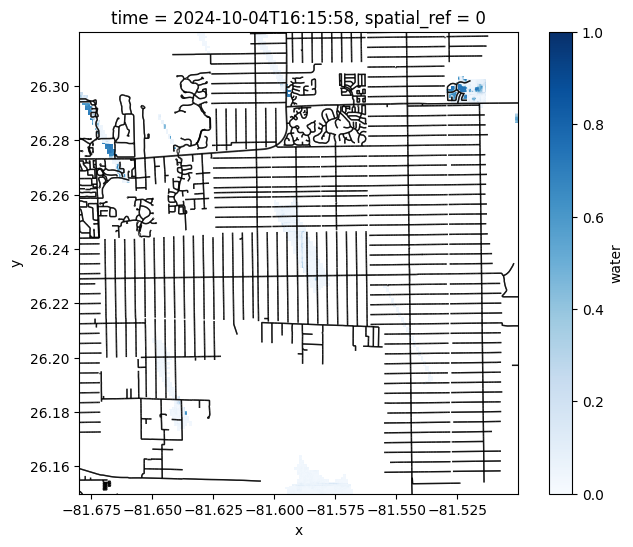

In [154]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_dyn_water.water.isel(time=2).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes, vmin=0, vmax=1)

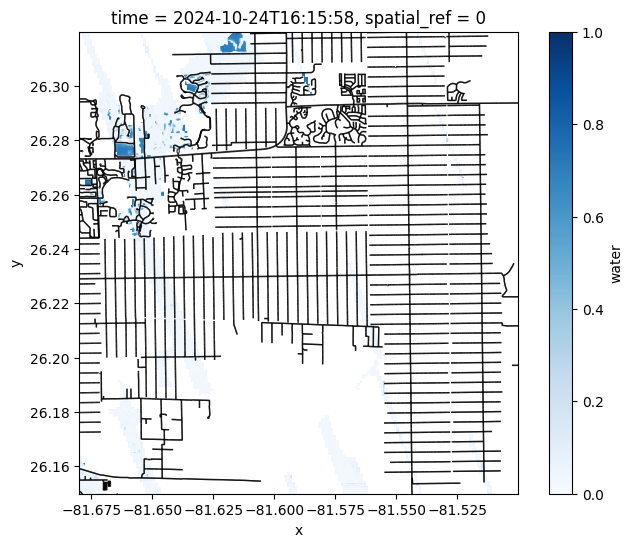

In [155]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_dyn_water.water.isel(time=7).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes, vmin=0, vmax=1)

# Sentinel 1

In [156]:
dataset=ee.ImageCollection('COPERNICUS/S1_GRD').filterDate('2024-10-01', '2024-10-31').filterBounds(aoi_city_smaller).select('VV')
# dataset = dataset.set('system:time_start', 0)
ds_s1 = dataset.wx.to_xarray(region=aoi_city_smaller.bounds(),scale=30)
ds_s1

Requesting data:   0%|          | 0/9 [00:00<?, ?it/s]

<xarray.Dataset> Size: 248MB
Dimensions:      (time: 9, x: 1856, y: 1858)
Coordinates:
  * time         (time) datetime64[ns] 72B 2024-10-03T23:28:22 ... 2024-10-27...
  * x            (x) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
  * y            (y) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
    spatial_ref  int64 8B 0
Data variables:
    VV           (time, y, x) float64 248MB nan nan nan nan ... nan nan nan nan
Attributes:
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    AREA_OR_POINT:           Area
    _FillValue:              -32768.0
    scale_factor:            1.0
    add_offset:              0.0

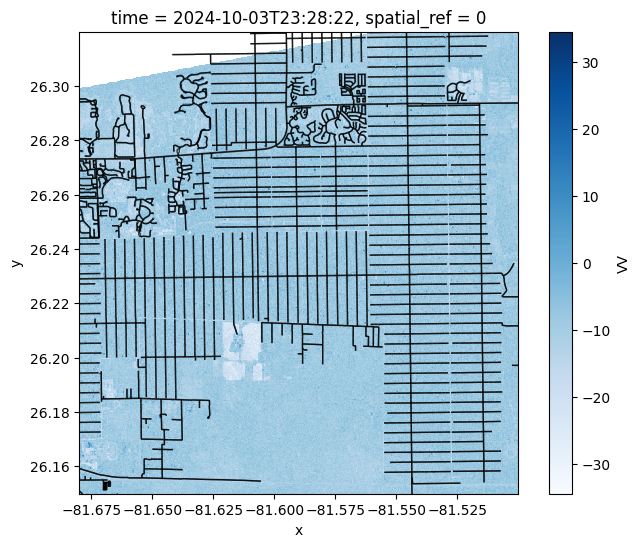

In [157]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_s1.VV.isel(time=0).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

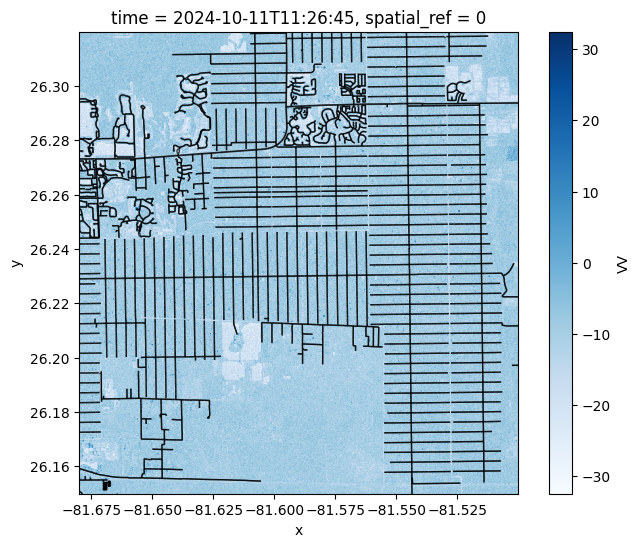

In [158]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_s1.VV.isel(time=3).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

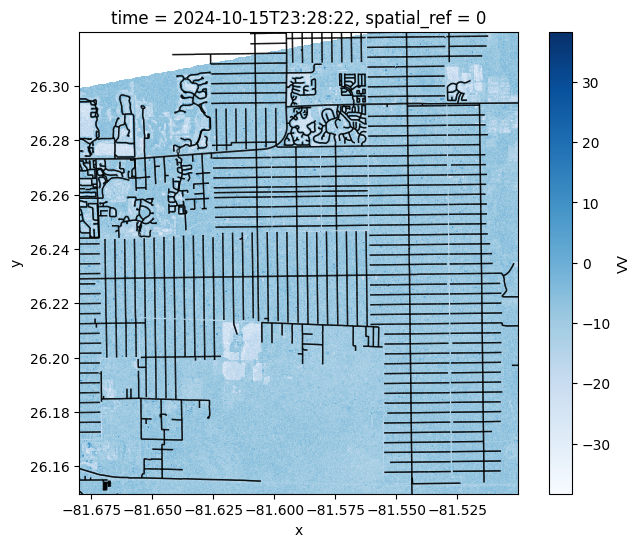

In [159]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_s1.VV.isel(time=4).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

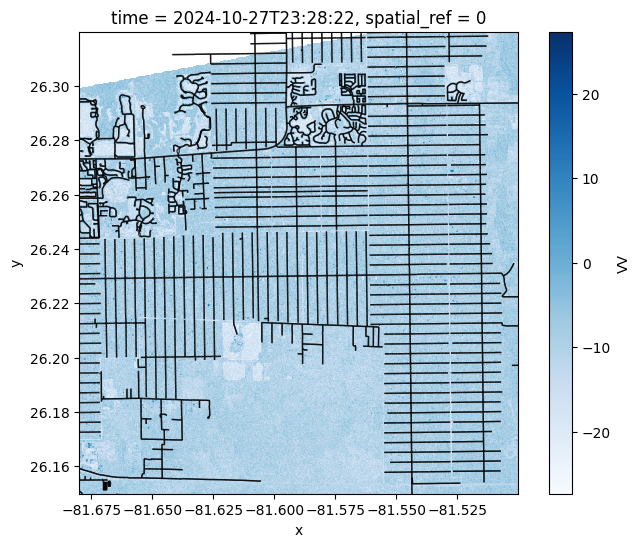

In [160]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_s1.VV.isel(time=7).sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

# Lets take 3 Oct as before flooding and 15 Oct as after flooding

In [161]:
s1_diff = ds_s1.VV.isel(time=4) - ds_s1.VV.isel(time=0)
s1_diff

<xarray.DataArray 'VV' (y: 1858, x: 1856)> Size: 28MB
array([[        nan,         nan,         nan, ...,  1.90093625,
        -3.29352487, -1.65945365],
       [        nan,         nan,         nan, ...,  2.47547981,
         1.41459374,  1.27980437],
       [        nan,         nan,         nan, ..., -1.13466902,
         0.0400986 ,  0.84664158],
       ...,
       [-0.05401692,  3.18219737, -1.11348861, ...,  0.51835419,
         1.68976235, -2.8488302 ],
       [ 0.7139414 , -1.4881273 , -0.47020143, ..., -0.08909643,
        -0.04628938,  0.4150616 ],
       [-0.16244515, -0.30838304,  0.84408059, ..., -0.26830385,
         1.64841185,  1.44879577]])
Coordinates:
  * x            (x) float64 15kB -81.68 -81.68 -81.68 ... -81.18 -81.18 -81.18
  * y            (y) float64 15kB 26.32 26.32 26.32 26.32 ... 25.82 25.82 25.82
    spatial_ref  int64 8B 0

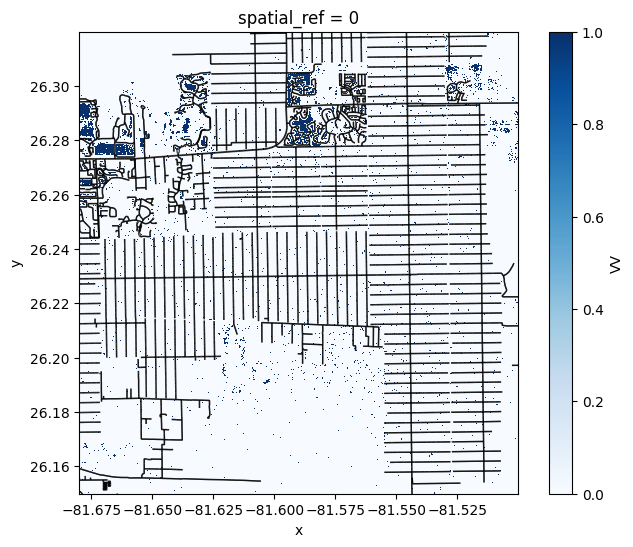

In [162]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
s1_diff_mask = s1_diff<-6 # Over flat areas 6 dB reduction is assumed to cause flooding
s1_diff_mask.sel(x=slice(-81.68,-81.5)).sel(y=slice(26.32,26.15)).plot(cmap='Blues', ax=axes)

# Flooded Infrastructure

In [163]:
flooded_infrastructure_np = s1_diff_mask.values*ds_ndui_c.ndui_mask.values
ds_ndui_c['flooded_infrastructure'] = (('lat', 'lon'), flooded_infrastructure_np)
ds_ndui_c

<xarray.Dataset> Size: 83MB
Dimensions:                 (lat: 1858, lon: 1856)
Coordinates:
  * lat                     (lat) float64 15kB 26.32 26.32 26.32 ... 25.82 25.82
  * lon                     (lon) float64 15kB -81.68 -81.68 ... -81.18 -81.18
Data variables:
    ndui                    (lat, lon) float64 28MB -0.2443 -0.2447 ... -0.9992
    ndui_mask               (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0
    flooded_infrastructure  (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0

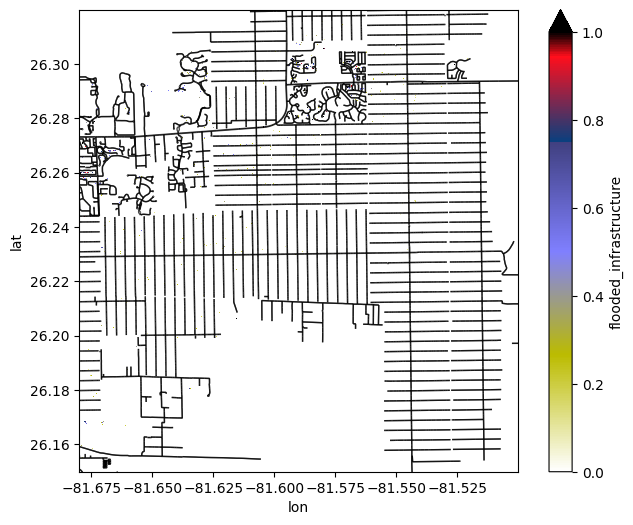

In [164]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_ndui_c.flooded_infrastructure.sel(lat=slice(26.32,26.15)).sel(lon=slice(-81.68,-81.5)).plot(cmap='gist_stern_r', vmin=0, vmax=1, extend='max', ax=axes)

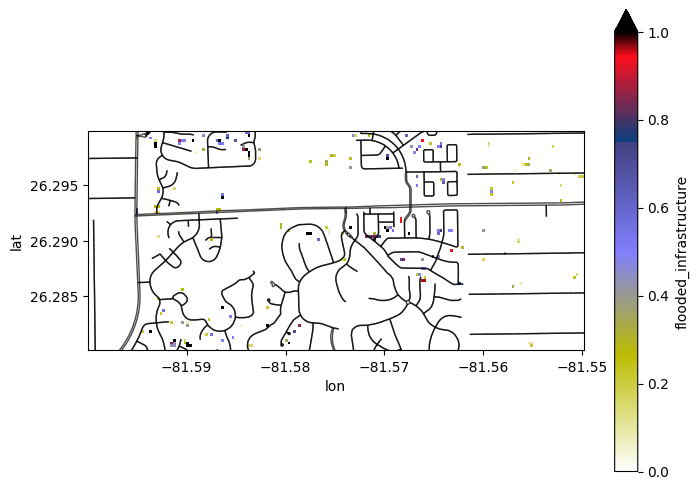

In [165]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_ndui_c.flooded_infrastructure.sel(lat=slice(26.3,26.28)).sel(lon=slice(-81.6,-81.55)).plot(cmap='gist_stern_r', vmin=0, vmax=1, extend='max', ax=axes)

In [168]:
ds_ndui_c['dollar_loss'] = (ds_ndui_c.flooded_infrastructure/ds_ndui_c.flooded_infrastructure.sum(skipna=True))*280000000
ds_ndui_c

<xarray.Dataset> Size: 110MB
Dimensions:                 (lat: 1858, lon: 1856)
Coordinates:
  * lat                     (lat) float64 15kB 26.32 26.32 26.32 ... 25.82 25.82
  * lon                     (lon) float64 15kB -81.68 -81.68 ... -81.18 -81.18
Data variables:
    ndui                    (lat, lon) float64 28MB -0.2443 -0.2447 ... -0.9992
    ndui_mask               (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0
    flooded_infrastructure  (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0
    dollar_loss             (lat, lon) float64 28MB -0.0 -0.0 -0.0 ... -0.0 -0.0

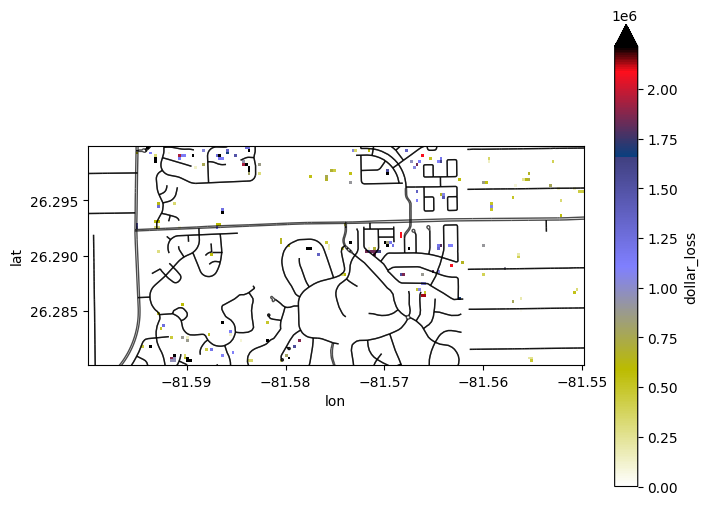

In [170]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
major_roads.plot(ax=axes, edgecolor='black', linewidth=1, alpha=0.7)
ds_ndui_c.dollar_loss.sel(lat=slice(26.3,26.28)).sel(lon=slice(-81.6,-81.55)).plot(cmap='gist_stern_r', vmin=0,  extend='max', ax=axes)